In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [19]:
with open('input/data/mergeset/annotation.json','r') as f:
    dataset = json.load(f)
dataset = dataset['images']
print(len(dataset))

1650


In [3]:
image_list = list(dataset.keys())
print(image_list[:5])

['1632280638944-7.jpg', '1632650015287-0.jpg', '20210314_105555.jpg', '20210825_215527.jpg', '20210911_181658.jpg']


In [17]:
def get_image(image_name, dataset, ROOT_PATH):
    
    image = cv2.imread(os.path.join(ROOT_PATH,f'images/{image_name}'))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    annotation_list = []
    #그에 맞는 어노테이션 가져오고
    for k,v in dataset[image_name]['words'].items():
        annotation_list.append(np.array(v['points'], dtype=np.int32))
    #cv2 로 그림 그린다.
    image = cv2.polylines(image, annotation_list, True, (255,0,0), 10)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

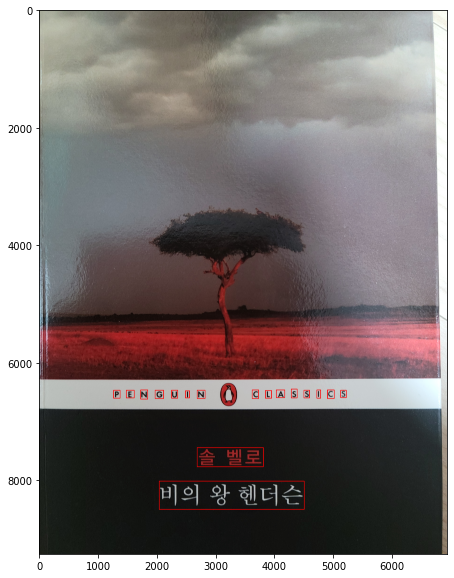

In [20]:
ROOT_PATH = '/opt/ml/input/data/mergeset'
get_image('20210925_135403.jpg', dataset, ROOT_PATH)

In [21]:
import json
with open('lab/train_3.json', 'r') as f:
    fold3 = json.load(f)
with open('lab/train_4.json', 'r') as ff:
    fold4 = json.load(ff)

In [22]:
fold3 = fold3['images']
fold4 = fold4['images']
print(len(fold3))
print(len(fold4))

1657
1657


In [23]:
fold3_images = set(fold3.keys())
fold4_images = set(fold4.keys())

results = fold3_images & fold4_images
print(len(results))

1243
